In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Error handling for file reading and data issues
file_path = r"C:\Users\etuna\OneDrive\Documents\top_creators_impact_2025.csv"

try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    df = None
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: The file could not be parsed.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

# Only proceed if df is loaded
if df is not None:
    # Handle missing data
    if df.isnull().values.any():
        print("Warning: Missing data detected. Filling missing values with column means (for numeric columns).")
        df = df.fillna(df.mean(numeric_only=True))
    else:
        print("No missing data detected.")

    # Convert columns to correct data types if needed (example: ensure 'views' is numeric)
    try:
        df['views'] = pd.to_numeric(df['views'], errors='coerce')
        df['likes_sum'] = pd.to_numeric(df['likes_sum'], errors='coerce')
    except Exception as e:
        print(f"Error converting columns to numeric: {e}")

    print("DataFrame is ready for analysis.")
else:
    print("DataFrame not loaded. Please check the errors above.")

File loaded successfully.
No missing data detected.
DataFrame is ready for analysis.


In [7]:

print("Shape:", df.shape)

Shape: (1000, 20)


In [8]:
print("Columns:", df.columns)

Columns: Index(['author_handle', 'platform', 'n_videos', 'views', 'avg_er', 'likes_sum',
       'dislikes_sum', 'comments_sum', 'shares_sum', 'saves_sum',
       'total_engagements', 'avg_engagement_velocity', 'avg_comment_ratio',
       'avg_share_rate', 'avg_save_rate', 'avg_like_dislike_ratio',
       'avg_engagement_per_1k', 'avg_like_rate', 'avg_dislike_rate',
       'creator_avg_views'],
      dtype='object')


In [9]:
print(df.dtypes)

author_handle               object
platform                    object
n_videos                     int64
views                        int64
avg_er                     float64
likes_sum                    int64
dislikes_sum                 int64
comments_sum                 int64
shares_sum                   int64
saves_sum                    int64
total_engagements            int64
avg_engagement_velocity    float64
avg_comment_ratio          float64
avg_share_rate             float64
avg_save_rate              float64
avg_like_dislike_ratio     float64
avg_engagement_per_1k      float64
avg_like_rate              float64
avg_dislike_rate           float64
creator_avg_views          float64
dtype: object


In [10]:
print("Columns:", df.columns)

Columns: Index(['author_handle', 'platform', 'n_videos', 'views', 'avg_er', 'likes_sum',
       'dislikes_sum', 'comments_sum', 'shares_sum', 'saves_sum',
       'total_engagements', 'avg_engagement_velocity', 'avg_comment_ratio',
       'avg_share_rate', 'avg_save_rate', 'avg_like_dislike_ratio',
       'avg_engagement_per_1k', 'avg_like_rate', 'avg_dislike_rate',
       'creator_avg_views'],
      dtype='object')


In [11]:
# Inspect first rows
print(df.head())

  author_handle platform  n_videos     views    avg_er  likes_sum  \
0   UrbanVision   TikTok       136  17938952  0.091914    1267238   
1  BeyondStudio   TikTok       135  17085072  0.087916    1121223   
2  StreetVision   TikTok       133  16843324  0.093018    1228515   
3     NextMedia   TikTok       148  16325236  0.092222    1161803   
4     PrimeLabs   TikTok       135  16240032  0.092307    1095828   

   dislikes_sum  comments_sum  shares_sum  saves_sum  total_engagements  \
0         36094        142403      125916     124572            1660129   
1         31594        123017      114620     130934            1489794   
2         28953        129169      114222     138762            1610668   
3         29124        128881      110655     119691            1521030   
4         28067        119613      105152     112859            1433452   

   avg_engagement_velocity  avg_comment_ratio  avg_share_rate  avg_save_rate  \
0             17957.902500           0.007648        0

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author_handle            1000 non-null   object 
 1   platform                 1000 non-null   object 
 2   n_videos                 1000 non-null   int64  
 3   views                    1000 non-null   int64  
 4   avg_er                   1000 non-null   float64
 5   likes_sum                1000 non-null   int64  
 6   dislikes_sum             1000 non-null   int64  
 7   comments_sum             1000 non-null   int64  
 8   shares_sum               1000 non-null   int64  
 9   saves_sum                1000 non-null   int64  
 10  total_engagements        1000 non-null   int64  
 11  avg_engagement_velocity  1000 non-null   float64
 12  avg_comment_ratio        1000 non-null   float64
 13  avg_share_rate           1000 non-null   float64
 14  avg_save_rate            

In [13]:
# Check missing values
print(df.isnull().sum())

author_handle              0
platform                   0
n_videos                   0
views                      0
avg_er                     0
likes_sum                  0
dislikes_sum               0
comments_sum               0
shares_sum                 0
saves_sum                  0
total_engagements          0
avg_engagement_velocity    0
avg_comment_ratio          0
avg_share_rate             0
avg_save_rate              0
avg_like_dislike_ratio     0
avg_engagement_per_1k      0
avg_like_rate              0
avg_dislike_rate           0
creator_avg_views          0
dtype: int64


In [14]:
# removes rows with missing values
# Handle missing values (drop or fill)
df = df.dropna()  # OR df.fillna(df.mean(), inplace=True)

In [15]:
# Basic statistics for numerical columns
print(df.describe())

          n_videos         views       avg_er     likes_sum  dislikes_sum  \
count  1000.000000  1.000000e+03  1000.000000  1.000000e+03   1000.000000   
mean     42.465000  4.355216e+06     0.075879  2.573848e+05  10513.751000   
std      26.342869  2.666411e+06     0.020263  1.900318e+05   6659.211004   
min       9.000000  1.854548e+06     0.042553  5.446000e+04   2319.000000   
25%      24.000000  2.476000e+06     0.051742  1.402745e+05   5513.000000   
50%      32.000000  3.401562e+06     0.088187  1.911170e+05   8735.000000   
75%      56.000000  5.521046e+06     0.092520  3.243828e+05  12915.000000   
max     148.000000  1.793895e+07     0.108453  1.267238e+06  44175.000000   

        comments_sum     shares_sum      saves_sum  total_engagements  \
count    1000.000000    1000.000000    1000.000000       1.000000e+03   
mean    28183.865000   24834.915000   26489.573000       3.368931e+05   
std     20914.041471   18323.531516   19561.921253       2.484570e+05   
min      5757.

In [16]:
# Extra: compute median and standard deviation manually
print("Median values:\n", df.median(numeric_only=True))

Median values:
 n_videos                   3.200000e+01
views                      3.401562e+06
avg_er                     8.818685e-02
likes_sum                  1.911170e+05
dislikes_sum               8.735000e+03
comments_sum               2.089550e+04
shares_sum                 1.840700e+04
saves_sum                  1.976500e+04
total_engagements          2.500570e+05
avg_engagement_velocity    1.393520e+04
avg_comment_ratio          7.252719e-03
avg_share_rate             6.453558e-03
avg_save_rate              6.658312e-03
avg_like_dislike_ratio     4.506086e+01
avg_engagement_per_1k      8.818685e+01
avg_like_rate              6.722775e-02
avg_dislike_rate           2.074820e-03
creator_avg_views          9.995250e+04
dtype: float64


In [17]:
print("Standard deviation:\n", df.std(numeric_only=True))

Standard deviation:
 n_videos                   2.634287e+01
views                      2.666411e+06
avg_er                     2.026330e-02
likes_sum                  1.900318e+05
dislikes_sum               6.659211e+03
comments_sum               2.091404e+04
shares_sum                 1.832353e+04
saves_sum                  1.956192e+04
total_engagements          2.484570e+05
avg_engagement_velocity    4.637210e+03
avg_comment_ratio          1.744353e-03
avg_share_rate             1.509105e-03
avg_save_rate              1.660129e-03
avg_like_dislike_ratio     1.775320e+01
avg_engagement_per_1k      2.026330e+01
avg_like_rate              1.546362e-02
avg_dislike_rate           7.126665e-04
creator_avg_views          1.796335e+04
dtype: float64


In [18]:
# Summary statistics
print(df.describe())

          n_videos         views       avg_er     likes_sum  dislikes_sum  \
count  1000.000000  1.000000e+03  1000.000000  1.000000e+03   1000.000000   
mean     42.465000  4.355216e+06     0.075879  2.573848e+05  10513.751000   
std      26.342869  2.666411e+06     0.020263  1.900318e+05   6659.211004   
min       9.000000  1.854548e+06     0.042553  5.446000e+04   2319.000000   
25%      24.000000  2.476000e+06     0.051742  1.402745e+05   5513.000000   
50%      32.000000  3.401562e+06     0.088187  1.911170e+05   8735.000000   
75%      56.000000  5.521046e+06     0.092520  3.243828e+05  12915.000000   
max     148.000000  1.793895e+07     0.108453  1.267238e+06  44175.000000   

        comments_sum     shares_sum      saves_sum  total_engagements  \
count    1000.000000    1000.000000    1000.000000       1.000000e+03   
mean    28183.865000   24834.915000   26489.573000       3.368931e+05   
std     20914.041471   18323.531516   19561.921253       2.484570e+05   
min      5757.

In [19]:
# Group by a categorical column and compute the mean of a numerical column
print(df.groupby("platform")["views"].mean())

platform
TikTok     4.603757e+06
YouTube    3.964834e+06
Name: views, dtype: float64


In [20]:

# Identifying patterns :# - Tiktok has the highest average views among platforms.
grouped = df.groupby("platform").mean(numeric_only=True)
print(grouped)


           n_videos         views    avg_er     likes_sum  dislikes_sum  \
platform                                                                  
TikTok    45.224223  4.603757e+06  0.091755  323324.95581   8928.332242   
YouTube   38.131105  3.964834e+06  0.050942  153812.92545  13003.958869   

          comments_sum    shares_sum     saves_sum  total_engagements  \
platform                                                                
TikTok    35454.450082  31224.528642  33226.130933      423230.065466   
YouTube   16764.000000  14798.786632  15908.501285      201284.213368   

          avg_engagement_velocity  avg_comment_ratio  avg_share_rate  \
platform                                                               
TikTok               14683.546223           0.007690        0.006767   
YouTube              15100.880718           0.004225        0.003753   

          avg_save_rate  avg_like_dislike_ratio  avg_engagement_per_1k  \
platform                                   

In [21]:
# Group by 'platform' and compute mean 'views'
mean_views = df.groupby("platform")["views"].mean()

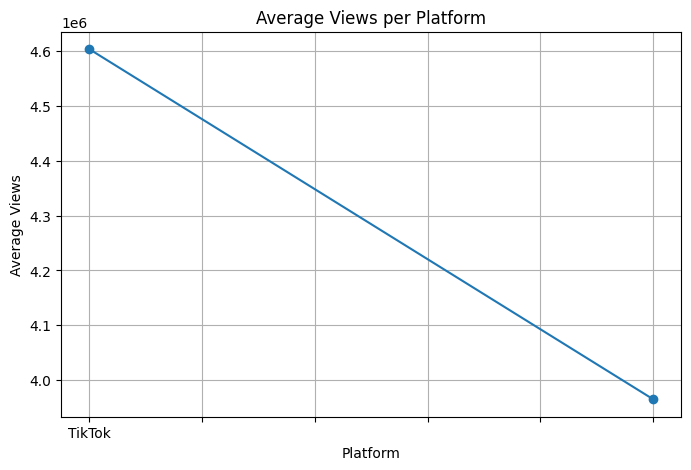

In [22]:
# Plot line graph
plt.figure(figsize=(8, 5))
mean_views.plot(kind='line', marker='o')
plt.title("Average Views per Platform")
plt.xlabel("Platform")
plt.ylabel("Average Views")
plt.grid(True)
plt.show()

C:\Users\etuna\AppData\Local\Temp\ipykernel_12000\877487217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_views.index, y=mean_views.values, palette='Blues_d')


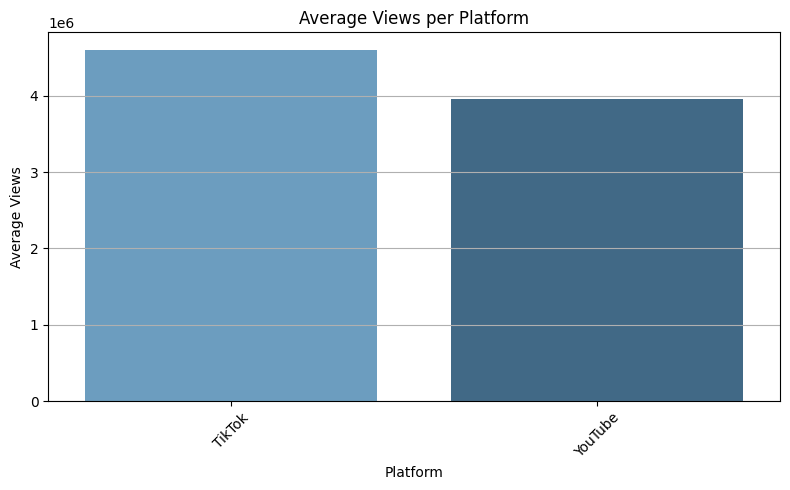

In [23]:
# Bar graph: Average views per platform
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_views.index, y=mean_views.values, palette='Blues_d')
plt.title("Average Views per Platform")
plt.xlabel("Platform")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

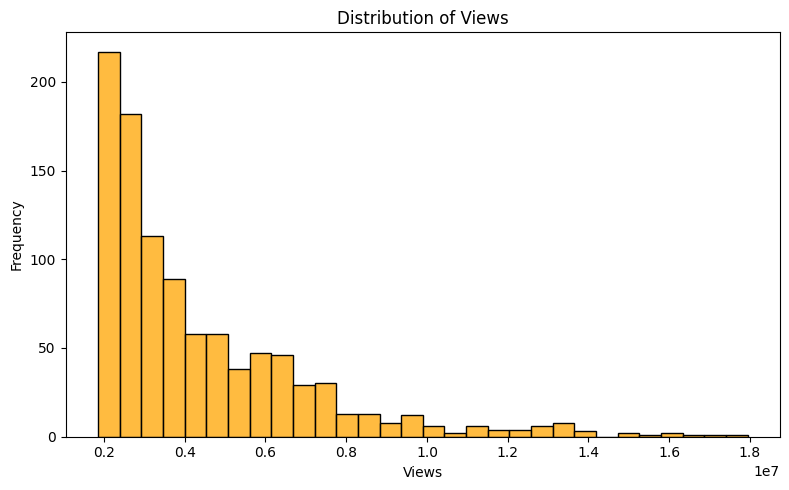

In [24]:
# Histogram of the 'views' column to understand its distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["views"], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

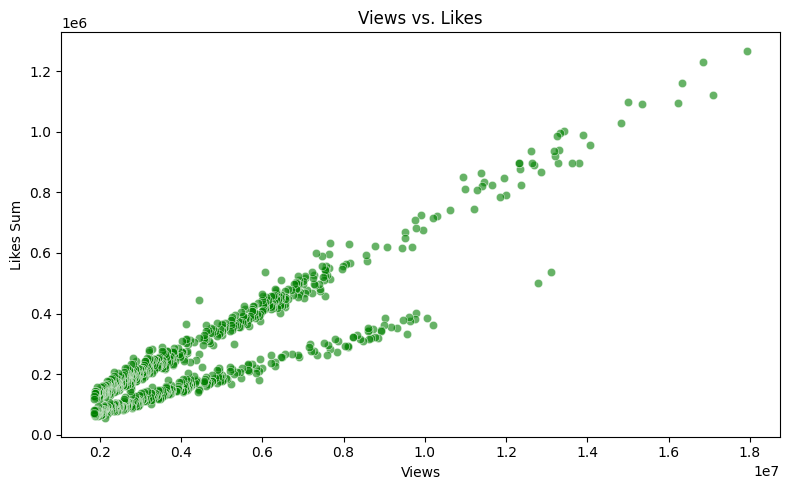

In [25]:
# Scatter plot to visualize the relationship between two numerical columns
plt.figure(figsize=(8, 5))
sns.scatterplot(x="views", y="likes_sum", data=df, color='green', alpha=0.6)
plt.title("Views vs. Likes")
plt.xlabel("Views")
plt.ylabel("Likes Sum")
plt.tight_layout()
plt.show()